# Variable Grouping
After loading the data, we will group the data into more generic groups in order to analyze general trends between these groups instead of individual observations.

In [3]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

In [5]:
wine = pd.read_csv("data/wine.2.clean.csv")

In [6]:
wine.head()

,id,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
0,1,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,2,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,3,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,4,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,5,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.dtypes

id                        int64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulfates                float64
alcohol                 float64
quality                   int64
dtype: object

### Categorical Variable Grouping

In [8]:
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(wine)

There are no categorical variables, but we can turn quality into a categorical variable to analyze the contents of the wine better.
#### Quality

In [13]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
bad = [0, 1, 2, 3]
okay = [4, 5]
good = [6, 7]
excellent = [8, 9, 10]

wine.loc[wine['quality'].isin(bad), 
             'quality_rating'] = 'Bad'

wine.loc[wine['quality'].isin(okay), 
             'quality_rating'] = 'Okay'

wine.loc[wine['quality'].isin(good), 
             'quality_rating'] = 'Good'

wine.loc[wine['quality'].isin(excellent), 
             'quality_rating'] = 'Excellent'

In [11]:
wine.quality_rating.value_counts()

Good         837
Okay         734
Excellent     18
Bad           10
Name: quality_rating, dtype: int64

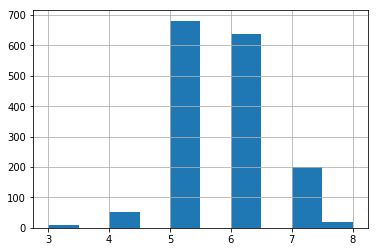

In [15]:
wine.quality.hist();

There are very few wines in the Excellent and Bad categories. The quality is not normally distributed, but it makes sense that there are few wines on the extremes and most are in the middle. If this variable was continuous rather than discrete there may have been more freedom to understand the distribution.

In [16]:
wine.quality_rating = wine.quality_rating.astype("category")
wine.quality_rating.dtype

CategoricalDtype(categories=['Bad', 'Excellent', 'Good', 'Okay'], ordered=False)

#### Alcohol Content

In [17]:
wine.head()

,id,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_rating
0,1,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,Okay
1,2,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,Okay
2,3,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,Okay
3,4,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,Good
4,5,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,Okay


### Continuous Variable Grouping

These continuous variables can now be sorted into more generic groups using tertiles and quintiles. This scale makes analysis more general and reading trends easier.

In [18]:
pH_level = ["low", "medium", "high"]

wine['pH_level'] = pd.qcut(wine['pH'],
                                  3, pH_level)

In [19]:
alcohol_content = ['very low', "low", "medium", "high", "very high"]

wine['alcohol_level'] = pd.qcut(wine['alcohol'],
                                  5, alcohol_content)

In [20]:
density_level = ['very low',"low",  "medium", "high", "very high"]

wine['density_level'] = pd.qcut(wine['density'],
                                  5, density_level)

In [21]:
citric_acid_level = ['very low',"low",  "medium", "high", "very high"]

wine['citric_acid_level'] = pd.qcut(wine['citric_acid'],
                                  5, citric_acid_level)

In [22]:
sugar_level = ['very low',"low",  "medium", "high", "very high"]

wine['sugar_level'] = pd.qcut(wine['residual_sugar'],
                                  5, sugar_level)

In [23]:
chloride_level = ['very low',"low",  "medium", "high", "very high"]

wine['chloride_level'] = pd.qcut(wine['chlorides'],
                                  5, chloride_level)

In [24]:
total_sulfur_level = ['very low',"low",  "medium", "high", "very high"]

wine['total_sulfur_level'] = pd.qcut(wine['total_sulfur_dioxide'],
                                  5, total_sulfur_level)

In [33]:
wine.head()

,id,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,quality_rating,pH_level,alcohol_level,density_level,citric_acid_level,sugar_level,chloride_level,total_sulfur_level
0,1,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,Okay,high,very low,high,very low,low,low,medium
1,2,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,Okay,low,low,medium,very low,high,very high,high
2,3,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,Okay,medium,low,medium,very low,medium,high,high
3,4,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,Good,low,low,high,very high,low,low,high
4,5,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,Okay,high,very low,high,very low,low,low,medium


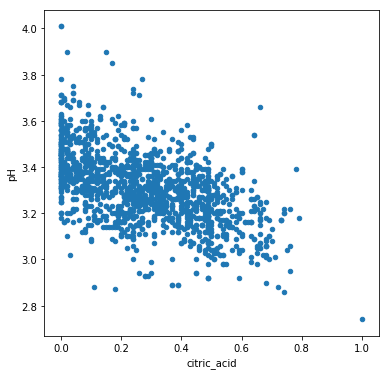

In [34]:
wine.plot.scatter(x="citric_acid",y="pH");

As acid levels increase, pH levels decrease. This means the wine becomes MORE acidic, even though it looks like an inverse relationship.

### Skewness and Symmetry of Data

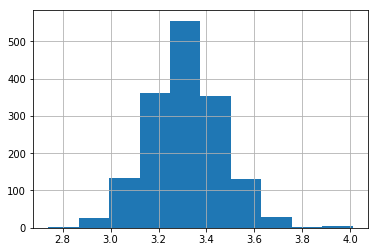

In [27]:
wine.pH.hist();

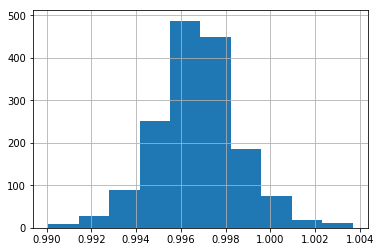

In [28]:
wine.density.hist();

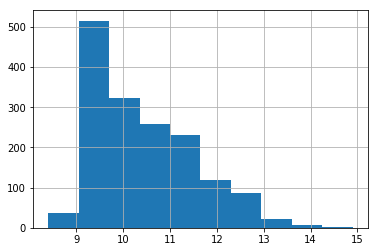

In [29]:
wine.alcohol.hist();

While the pH and density are normal and symmetrical, the alcohol content is very right skewed. 

### Conclusion
Now that we have cleaned and grouped the data we can begin to analyze it. We will export the data as a pickle file which is read and edited easily by pandas because it is a native python format, unlike CSV, a very simple format. 

In [30]:
wine.to_pickle("data/wine.3.grouped.pkl")